<center> <h2>Vibration Anomaly Detection</h2> </center>


**Goal** : An anomaly detection model for vibration failure dataset


**Dataset** : vibration sensor readings from four bearings. Dataset is sourced from The NASA Acoustics and Vibration Database

## A. Loading of Dataset

In [34]:
# importing packages
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

import pickle
import joblib
from keras.layers.core import Dense 
from keras.models import Model, Sequential, load_model
from keras import regularizers

In [2]:
df_filename = "BearingVibration_Dataset.csv"
df = pd.read_csv(df_filename, index_col="Unnamed: 0")

## B. Exploratory Data Analysis (EDA)

In [3]:
df

,Bearing 1,Bearing 2,Bearing 3,Bearing 4
2004-02-12 10:52:39,0.060236,0.074227,0.083926,0.044443
2004-02-12 11:02:39,0.061455,0.073844,0.084457,0.045081
2004-02-12 11:12:39,0.061361,0.075609,0.082837,0.045118
2004-02-12 11:22:39,0.061665,0.073279,0.084879,0.044172
2004-02-12 11:32:39,0.061944,0.074593,0.082626,0.044659
...,...,...,...,...
2004-02-19 05:42:39,0.453335,0.161016,0.137440,0.119047
2004-02-19 05:52:39,0.337583,0.132400,0.144992,0.092125
2004-02-19 06:02:39,0.351111,0.152266,0.151299,0.100817
2004-02-19 06:12:39,0.001857,0.003732,0.003656,0.001786


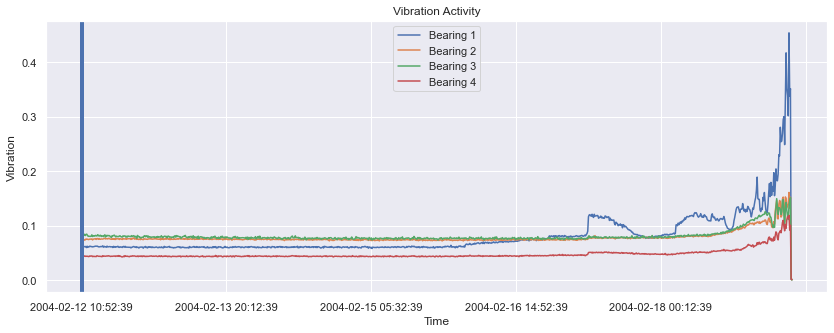

In [4]:
# Visualisation Data
ax = df.plot(figsize = (14,5), title="Vibration Activity" , legend = True)
ax.set(xlabel="Time", ylabel="Vibration")
plt.axvline(x=df.index[-1], linewidth=4, color='b')

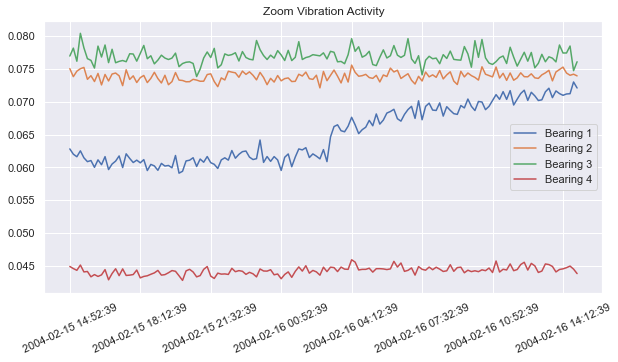

In [5]:
df['2004-02-15 14:52:39':'2004-02-16 14:52:39'].plot(figsize = (10,5), title="Zoom Vibration Activity" , legend = True)
ax.set(xlabel="Time", ylabel="Vibration")
plt.xticks(rotation=25);

In [6]:
# total missing value each columns
for col in df.columns.tolist():
    print('{} column missing values: {}'.format(col, df[col].isnull().sum()))

Bearing 1 column missing values: 0
Bearing 2 column missing values: 0
Bearing 3 column missing values: 0
Bearing 4 column missing values: 0


>- **start_date** : 2004-02-12 10:52:39 
>- **end_date** : 2004-02-19 06:22:39
>- **range** : 10 min
>- **missing values** : 0
>- **total data** : 982
>- Vibration Bearing 1 start increase on 2004-02-16 04:12:39

## C. Data Preparation

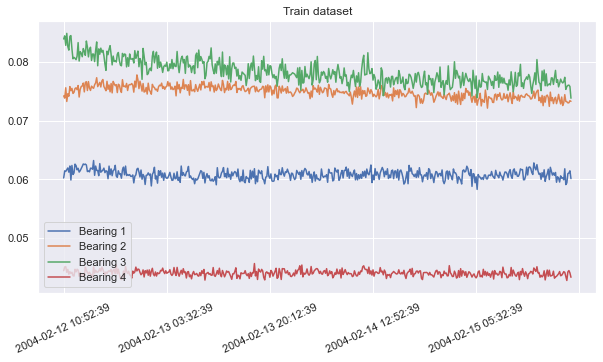

In [7]:
train_df = df[:'2004-02-15 20:52:39'] # represent normal operating conditions
test_df = df['2004-02-15 20:52:39':] # leading up to the bearing failure
train_df.plot(figsize = (10,5), title="Train dataset" , legend = True) 
plt.xticks(rotation=25);

In [10]:
# Standardize the data.
scaler = StandardScaler()
scaler = scaler.fit(train_df)
x_train = pd.DataFrame(scaler.transform(train_df),
                       columns=train_df.columns, index=train_df.index)
x_test = pd.DataFrame(scaler.transform(test_df),
                       columns=test_df.columns, index=test_df.index)

### D. Modelling

**Comparing Methods**

 Comparing methods based on the Journal "Review of Vibration-Based Structural Health Monitoring Using Deep Learning" [1]. There are several studies related to vibration health monitoring on bearings, using the Sparse Autoencoder (SAE) and Denoising Autoencoder (DAE) methods.

<img src="table_1_comparing methods.png" alt="drawing" width="600"/>

<img src="table_2_comparing methods.png" alt="drawing" width="600"/>

In this task, the approach used is Autoencoder.

In [25]:
for i, col in enumerate(df.columns):
    print(f'================= TRAINING {col} ==================')
    autoencoder = Sequential()
    autoencoder.add(Dense(9,activation='elu',
                kernel_initializer='glorot_uniform',
                kernel_regularizer=regularizers.l2(0.0),
                input_shape=(x_train.shape[1],)))
    autoencoder.add(Dense(3,activation='elu',
                kernel_initializer='glorot_uniform'))
    autoencoder.add(Dense(9,activation='elu',
                kernel_initializer='glorot_uniform'))
    autoencoder.add(Dense(x_train.shape[1],
                kernel_initializer='glorot_uniform'))
    autoencoder.compile(optimizer='adam', loss="mse")
    
    hist = autoencoder.fit(np.array(x_train),np.array(x_train), batch_size=10, 
                  epochs=25,validation_split=0.05,verbose = 1)
    
    autoencoder.save("model/model_%s.h5"%col)
        
    print('\n================ DONE ================')

================= TRAINING Bearing 1 ==================
Epoch 1/25
47/47 [==============================] - 1s 6ms/step - loss: 1.0024 - val_loss: 1.1883
Epoch 2/25
47/47 [==============================] - 0s 3ms/step - loss: 0.7183 - val_loss: 0.7822
Epoch 3/25
47/47 [==============================] - 0s 3ms/step - loss: 0.5230 - val_loss: 0.4721
Epoch 4/25
47/47 [==============================] - 0s 2ms/step - loss: 0.4109 - val_loss: 0.3767
Epoch 5/25
47/47 [==============================] - 0s 3ms/step - loss: 0.3506 - val_loss: 0.3418
Epoch 6/25
47/47 [==============================] - 0s 3ms/step - loss: 0.2994 - val_loss: 0.3173
Epoch 7/25
47/47 [==============================] - 0s 3ms/step - loss: 0.2599 - val_loss: 0.2991
Epoch 8/25
47/47 [==============================] - 0s 3ms/step - loss: 0.2354 - val_loss: 0.2822
Epoch 9/25
47/47 [==============================] - 0s 3ms/step - loss: 0.2203 - val_loss: 0.2657
Epoch 10/25
47/47 [==============================] - 0s 3ms/st